In [96]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/hitp')

import utils_qm as uqm
import prepare_calculations as pc

## error analysis

In [146]:
compounds = ['CH4','NH3','H2O', 'HF', 'ethane', 'ethene', 'ethyne', 'HCN']
errors = dict()
for comp in compounds:
    filepath = f'/data/sahre/projects/finite_differences/small_molecules/{comp}/integration_error.txt'
    errors[comp] = np.loadtxt(filepath)

In [157]:
error_mol = []
error_atom = []
for k in errors:
    error_mol.append(errors[k][-2])
    error_atom.append(errors[k][-1])
    
error_mol = np.array(error_mol)
error_atom = np.array(error_atom)

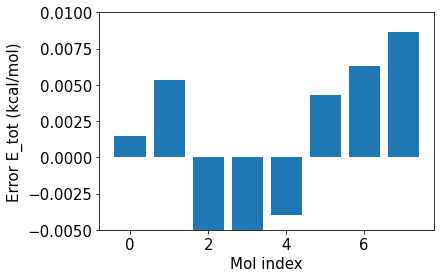

In [171]:
bar_x = np.arange(len(error_mol))
plt.bar(bar_x, error_mol)
plt.ylim(-0.005,0.01)

# plt.ylim(-10,10)

plt.xlabel('Mol index')
plt.ylabel('Error E_tot (kcal/mol)')
# plt.savefig('/home/sahre/projects/derivatives/figures/atomic_energies_small_molecules/error_mol_ha.png', dpi = 300, bbox_inches = 'tight')
# plt.savefig('/home/sahre/projects/derivatives/figures/atomic_energies_small_molecules/error_mol_kcal.png', dpi = 300, bbox_inches = 'tight')
# plt.savefig('/home/sahre/projects/derivatives/figures/atomic_energies_small_molecules/error_mol_kcal_full.png', dpi = 300, bbox_inches = 'tight')

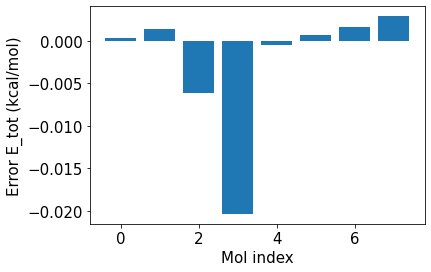

In [181]:
bar_x = np.arange(len(error_atom))
plt.bar(bar_x, error_atom)
# plt.ylim(-0.001,0.003)

# plt.ylim(-10,10)

plt.xlabel('Mol index')
plt.ylabel('Error E_tot (kcal/mol)')
# plt.savefig('/home/sahre/projects/derivatives/figures/atomic_energies_small_molecules/error_atom_ha_full.png', dpi = 300, bbox_inches = 'tight')
# plt.savefig('/home/sahre/projects/derivatives/figures/atomic_energies_small_molecules/error_mol_kcal.png', dpi = 300, bbox_inches = 'tight')
# plt.savefig('/home/sahre/projects/derivatives/figures/atomic_energies_small_molecules/error_mol_kcal_full.png', dpi = 300, bbox_inches = 'tight')

# Compare atomic energies

In [139]:
compounds = ['CH4','NH3','H2O', 'HF', 'ethane', 'ethene', 'ethyne', 'HCN']
df = dict()
for comp in compounds:
    df[comp] = pd.read_csv(f'/data/sahre/projects/finite_differences/small_molecules/{comp}/atomic_energies.csv')


### compare energies elementwise

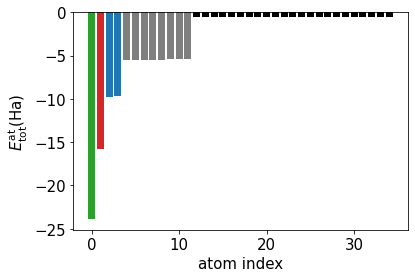

In [140]:
atomic_energies_all = []

for comp in compounds:
    atomic_energies_all.extend(df[comp]['E_tot'])

atomic_energies_all.sort()
colors = ['tab:green'] + ['tab:red'] + 2*['tab:blue'] + 8*['tab:gray'] + 23*['black']
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1,1)

x = np.arange(len(atomic_energies_all))
ax.bar(x, atomic_energies_all, color = colors)
ax.set_xlabel('atom index')
ax.set_ylabel(r'$E_{\rm{tot}}^{\rm{at}} $(Ha)')

plt.savefig('/home/sahre/projects/derivatives/figures/atomic_energies_small_molecules/small_molecules_all.png', dpi = 300, bbox_inches = 'tight')

### compare within same element

In [141]:
def plot_one_element(atomic_energies_element, el):
    x = np.arange(len(atomic_energies_element[el]))
    plt.rcParams['font.size'] = 15
    fig, ax = plt.subplots(1,1)
    ax.bar(x, atomic_energies_element[el]-np.max(atomic_energies_element[el]))
    ax.set_xlabel('atom index')
    ax.set_ylabel(r'$E_{\rm{tot}}^{\rm{at}} $(Ha)')
    
    return(fig, ax)

In [142]:
atomic_energies_element = {'H':[], 'C':[], 'N':[], 'O':[], 'F':[]}

for comp in compounds:
    for k in atomic_energies_element:
        Z = uqm.el2Z(k)
        ae_tmp = df[comp].loc[df[comp]['Z_nuc'] == Z, 'E_tot']
        atomic_energies_element[k].extend(ae_tmp)
for k in atomic_energies_element:
    atomic_energies_element[k] = np.array(atomic_energies_element[k])

In [193]:
error_atom

array([ 0.00030098,  0.00133696, -0.00620964, -0.02037686, -0.00049312,
        0.00071454,  0.00157464,  0.00287572])

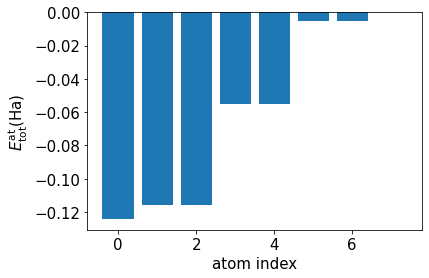

In [143]:
el = 'C'
fig, ax = plot_one_element(atomic_energies_element, el)
fig.savefig(f'/home/sahre/projects/derivatives/figures/atomic_energies_small_molecules/small_molecules_{el}.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
get error per atom
error per atom + ueg

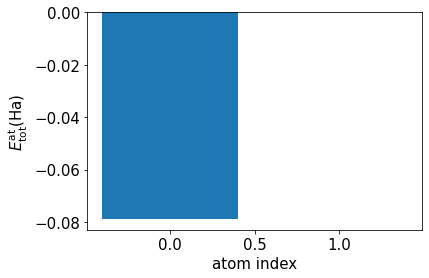

In [144]:
el = 'N'
fig, ax = plot_one_element(atomic_energies_element, el)
fig.savefig(f'/home/sahre/projects/derivatives/figures/atomic_energies_small_molecules/small_molecules_{el}.png', dpi = 300, bbox_inches = 'tight')

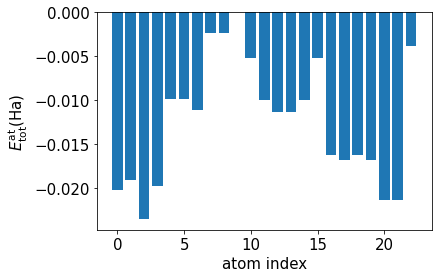

In [145]:
el = 'H'
fig, ax = plot_one_element(atomic_energies_element, el)
fig.savefig(f'/home/sahre/projects/derivatives/figures/atomic_energies_small_molecules/small_molecules_{el}.png', dpi = 300, bbox_inches = 'tight')

### Identical H atoms have different energy?

In [102]:
from ase import Atoms

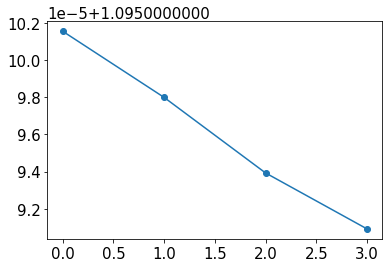

In [137]:
out = pc.parse_xyz_for_CPMD_input('/data/sahre/projects/finite_differences/small_molecules/CH4/GEOMETRY.xyz')
CH4_mol = Atoms(numbers=out[1], positions=out[2])

ch_dist = []
for i in range(4):
    ch_dist.append(CH4_mol.get_distance(i,4))
    
plt.plot(ch_dist, '-o')

# angles = []
# for i in range(4):
#     for j in range(i, 4):
#         if i != j:
#             angles.append(CH4_mol.get_angle(i,4,j))
        
# plt.plot(angles, '-o')

In [132]:
CH4_mol.get_atomic_numbers()

array([6, 6, 1, 1, 1, 1, 1, 1])

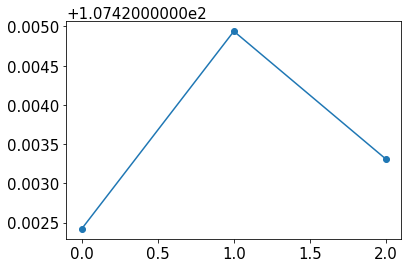

In [138]:
out = pc.parse_xyz_for_CPMD_input('/data/sahre/projects/finite_differences/small_molecules/ethane/GEOMETRY.xyz')
CH4_mol = Atoms(numbers=out[1], positions=out[2])

# ch_dist = []
# for i in range(2,5):
#     ch_dist.append(CH4_mol.get_distance(i,0))
# for i in range(2,5):
#     ch_dist.append(CH4_mol.get_distance(i,0))
    
# plt.plot(ch_dist, '-o')

angles = []
for i in range(2,5):
    for j in range(i, 5):
        if i != j:
            angles.append(CH4_mol.get_angle(i,0,j))
        
plt.plot(angles, '-o')

In [136]:
ch_dist

[1.0989773616988427, 1.0989831475093492, 1.0989761490608794]